Made by: Srinivas Dengle

# Executive Summary
As we all know, the real estate market has been gone up in value. There are individuals who are trying to buy a house for themselves or as a rental property. This notebook will be helpful in predicting house prices for the prospective buyers. This notebook contains preprocessing, model development and analysis including: decision tree and support vector machine, model selection and conclusion. In the preprocessing section I have cleaned the data using pandas which includes dropping irrelevant columns, removing any null values, and writing each column in terms of z-score. After developing and comparing the models, we came to a conclusion that decision tree worked better than support vector machine. Support vector machine did not perform that well compared to decision tree. 

Words: 123

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from utils9 import display_tree



In [19]:
# Reading the CSV file
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Preprocessing

In [20]:
# Droppping irrelevant columns
df.drop(df[["id", "date", "waterfront" ,"view", "lat", "long"]], axis=1, inplace=True)
df.head(100)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,905000.0,4,2.50,3300,10250,1.0,3,7,2390,910,1946,1991,98040,1950,6045
96,247500.0,3,1.75,1960,15681,1.0,3,7,1960,0,1967,0,98032,1750,15616
97,199000.0,4,1.50,1160,6400,1.0,4,7,1160,0,1975,0,98023,1160,6400
98,314000.0,3,1.75,1810,41800,1.0,5,7,1210,600,1980,0,98038,1650,135036


In [21]:
# decribing in order to know the statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0
sqft_above,21613.0,1788.390691,828.090978,290.0,1190.00,1560.00,2210.0,9410.0
sqft_basement,21613.0,291.509045,442.575043,0.0,0.00,0.00,560.0,4820.0


In [22]:
# removing null values from the data frame
df.dropna(inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,0,98103,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,0,98146,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,0,98144,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,0,98027,1410,1287


In [23]:
# choosing columns that i want to write it in terms of z_score
features = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "sqft_living15", "sqft_lot15"]]
mean = features.mean()
stdev = features.std()

#z-score formula
new_df = (features - mean) / stdev
df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "sqft_living15", "sqft_lot15"]] = new_df
new_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.629172,-0.558823,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.943333,-0.260709
1,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.629172,-0.558823,0.460830,0.245136,-0.681063,4.746568,0.879547,-0.432676,-0.187863
2,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.629172,-1.409554,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.070115,-0.172371
3,0.676469,1.149422,-0.130547,-0.244009,-0.915406,2.444237,-0.558823,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.914153,-0.284515
4,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.629172,0.291909,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,-0.272184,-0.192844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398728,0.500209,-0.598732,-0.337417,2.788374,-0.629172,0.291909,-0.312032,-0.658666,1.293512,-0.210124,0.468371,-0.666119,-0.412371
21609,0.676469,0.500209,0.250534,-0.224381,0.936484,-0.629172,0.291909,0.629894,-0.658666,1.463734,-0.210124,1.272034,-0.228413,-0.203942
21610,-1.473925,-1.772037,-1.154021,-0.332129,0.936484,-0.629172,-0.558823,-0.927906,-0.658666,1.293512,-0.210124,1.234654,-1.410220,-0.394132
21611,-0.398728,0.500209,-0.522516,-0.307069,0.936484,-0.629172,0.291909,-0.227500,-0.658666,1.123290,-0.210124,-0.952056,-0.841202,-0.420502


In [24]:
# New dataframe with a price column
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.629172,-0.558823,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.943333,-0.260709
1,538000.0,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.629172,-0.558823,0.460830,0.245136,-0.681063,4.746568,0.879547,-0.432676,-0.187863
2,180000.0,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.629172,-1.409554,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.070115,-0.172371
3,604000.0,0.676469,1.149422,-0.130547,-0.244009,-0.915406,2.444237,-0.558823,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.914153,-0.284515
4,510000.0,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.629172,0.291909,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,-0.272184,-0.192844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,-0.398728,0.500209,-0.598732,-0.337417,2.788374,-0.629172,0.291909,-0.312032,-0.658666,1.293512,-0.210124,0.468371,-0.666119,-0.412371
21609,400000.0,0.676469,0.500209,0.250534,-0.224381,0.936484,-0.629172,0.291909,0.629894,-0.658666,1.463734,-0.210124,1.272034,-0.228413,-0.203942
21610,402101.0,-1.473925,-1.772037,-1.154021,-0.332129,0.936484,-0.629172,-0.558823,-0.927906,-0.658666,1.293512,-0.210124,1.234654,-1.410220,-0.394132
21611,400000.0,-0.398728,0.500209,-0.522516,-0.307069,0.936484,-0.629172,0.291909,-0.227500,-0.658666,1.123290,-0.210124,-0.952056,-0.841202,-0.420502


# Decision Tree


In [25]:
x = df.drop(columns=["price"])
y = df["price"]

I did 70/15/15 split training/testing/validation.

max_depth: It controls the maximum number of levels in the tree, higher the number the more detail the model will capture make more complex.<br>

max_features: It helps you in chosing how many features you want to include in the training process. <br>

min_impurity_decrease: Controls the impurity required to split in a decision tree. If the value is higher the shallower the decision tree will be. <br>

min_samples_leaf: minimum number of samples required to form one node in a decision tree. If the number is higher it will result in larger leaf node, therefore reducing the overfitting. <br>

min_samples_split: Minimum number of samples required to split the node in a decision tree.

In [49]:
# i did 70/15/15 training/testing/validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)
x_test, x_val, y_test, y_val = train_test_split(x, y, test_size=0.5)

# creating a list of for each of the hyperparameter that will be used for training the model
md = [10, 20, 30, 35]
mmf = [0.5, 0.8, 0.6, 0.7]
mid = [0.0, 0.00123, 0.0165, 0.152]
msl = [1, 5, 10, 15]
mss = [2, 5, 10, 20]

for i, j, k, l, m in zip(md, mmf, mid, msl, mss):
    dtc_small = DecisionTreeRegressor(criterion="poisson",
                                    max_depth=i, 
                                    max_features=j, 
                                    min_impurity_decrease=k, 
                                    min_samples_leaf=l, 
                                    min_samples_split=m
                                    )
    # fitting the data 
    dtc_small.fit(x_train, y_train)

    # Predict on training data and calculate evaluation metrics
    y_train_pred = dtc_small.predict(x_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Predict on validation data and calculate evaluation metrics
    y_val_pred = dtc_small.predict(x_val)
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    
    print("R2 Score (train): ", r2_train)
    print("R2 Score (val): ", r2_val)
    print("Mean Squared Error (train): ", mse_train)
    print("Mean Absolute Error (train): ", mae_train)
    print("Mean Squared Error (val): ", mse_val)
    print("Mean Absolute Error (val): ", mae_val)
    print()
    

R2 Score (train):  0.8586951460235134
R2 Score (val):  0.7830729708629428
Mean Squared Error (train):  18738791815.983475
Mean Absolute Error (train):  94444.34124504043
Mean Squared Error (val):  29245447845.31963
Mean Absolute Error (val):  105367.18572561396

R2 Score (train):  0.8943119226175886
R2 Score (val):  0.827159764861484
Mean Squared Error (train):  14015561559.053818
Mean Absolute Error (train):  65238.02944108914
Mean Squared Error (val):  23301799238.317005
Mean Absolute Error (val):  80664.24833485286

R2 Score (train):  0.8168662617720698
R2 Score (val):  0.765180143915861
Mean Squared Error (train):  24285825281.748917
Mean Absolute Error (train):  89073.33902516006
Mean Squared Error (val):  31657704811.949615
Mean Absolute Error (val):  98269.43665303204

R2 Score (train):  0.7923281879266495
R2 Score (val):  0.7521682698774723
Mean Squared Error (train):  27539880923.96396
Mean Absolute Error (train):  94172.95516213076
Mean Squared Error (val):  33411926427.73146

In [41]:
# Defining the hyperparameter grid to search
hyper = {
    'max_depth': [10, 20, 30, 35],
    'max_features': [0.5, 0.8, 0.6, 0.7],
    'min_impurity_decrease': [0.0, 0.00123, 0.0165, 0.152],
    'min_samples_leaf': [1, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20]
}

dt_regressor = DecisionTreeRegressor(criterion="poisson")

dt_regressor.fit(x_train,y_train)

# Creating a GridSearchCV 
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=hyper, scoring='r2', cv=5)

# Fitting the grid search to the training data
grid_search.fit(x_train, y_train)

y_pred2 = grid_search.predict(x_val)

# Calculate evaluation metrics
r2 = r2_score(y_val, y_pred2)
mse = mean_squared_error(y_val, y_pred2)
mae = mean_absolute_error(y_val, y_pred2)

# Print the evaluation metrics and best hyperparameter settings
print("Best Hyperparameter Settings: ", grid_search.best_params_)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Predicted Values:", y_pred2)


Best Hyperparameter Settings:  {'max_depth': 30, 'max_features': 0.8, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 10, 'min_samples_split': 10}
R2 Score: 0.799526005943709
Mean Squared Error: 28035928638.834957
Mean Absolute Error: 92218.23049593448
Predicted Values: [495100.         778903.26666667 662682.64285714 ... 744445.
 242928.125      292104.16666667]


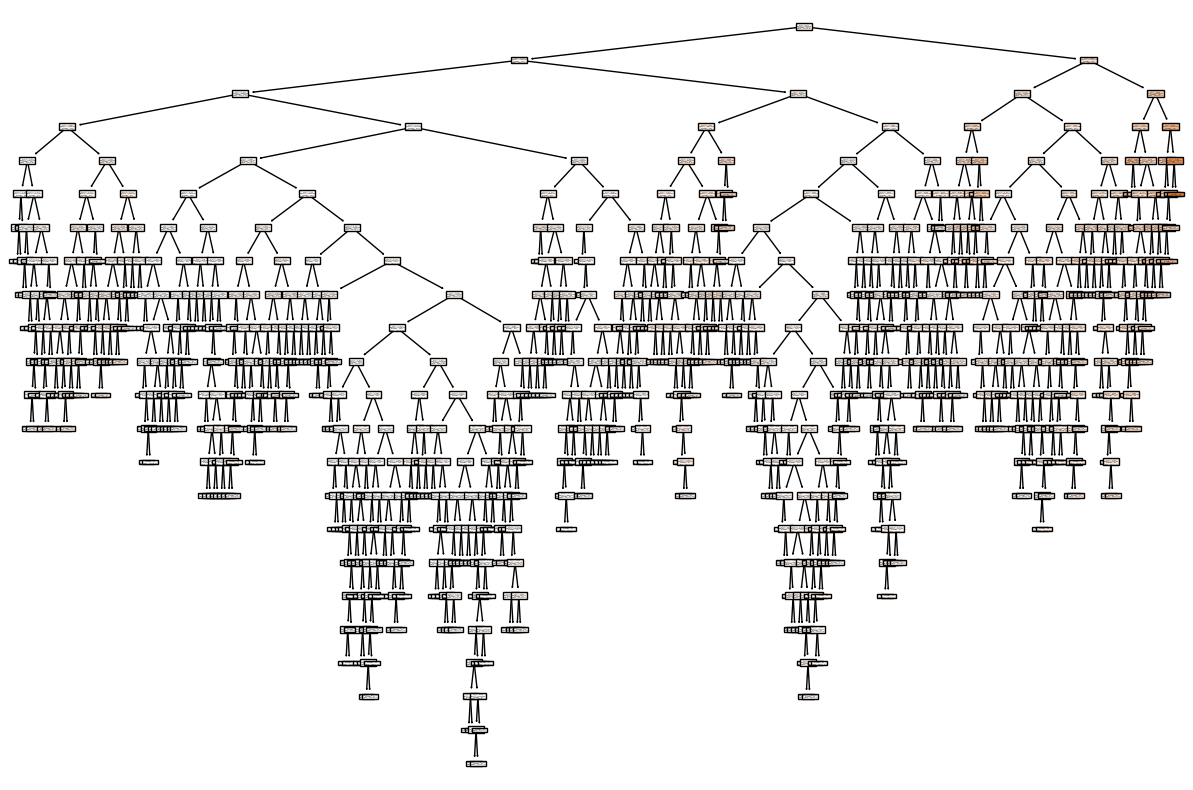

In [42]:
plt.figure(figsize=(15, 10))
plot_tree(dtc_small, filled=True)
plt.show()

## Caparing models

The best parameters are: max_depth: 30, <br>
                        max_features: 0.8, <br>
                        min_impurity_decrease: 0.01, <br>
                        min_samples_leaf: 10, <br>
                        min_samples_split: 10 <br>
                        
Based on the models above I conclude that the model is overfitting. The training set had a higher value than the validation set, the model has trained too well. 

# SVM

In [43]:
# Define the values of C, gamma, and degree to experiment with
C_values = [2, 4, 15]
gamma_values = [0.1, 2, 10]
degree_values = [2, 3, 4]

# Initialize dictionaries to store results for each kernel
linear_results = {}
rbf_results = {}
poly_results = {}

# Loop over C values for linear kernel
for C in C_values:
    # Create an SVM model with linear kernel
    l_svm = SVR(kernel='linear', C=C)
    l_svm.fit(x_train, y_train)
    l_preds = l_svm.predict(x_val)
    l_rmse = np.sqrt(mean_squared_error(y_val, l_preds))
    l_mse = mean_squared_error(y_val, l_preds)
    l_r2 = r2_score(y_val, l_preds)
    linear_results[C] = {'RMSE': l_rmse, 'MSE': l_mse, 'R2': l_r2}

    print("Linear SVM with C =", C)
    print("RMSE:", l_rmse)
    print("MSE:", l_mse)
    print("R2 Score:", l_r2)
    print()

# Loop over gamma values for RBF kernel
for gamma in gamma_values:
    # Create an SVM model with RBF kernel
    rbf_svm = SVR(kernel='rbf', gamma=gamma)
    rbf_svm.fit(x_train, y_train)
    rbf_preds = rbf_svm.predict(x_val)
    rbf_rmse = np.sqrt(mean_squared_error(y_val, rbf_preds))
    rbf_mse = mean_squared_error(y_val, rbf_preds)
    rbf_r2 = r2_score(y_val, rbf_preds)
    rbf_results[gamma] = {'RMSE': rbf_rmse, 'MSE': rbf_mse, 'R2': rbf_r2}

    print("RBF SVM with gamma =", gamma)
    print("RMSE:", rbf_rmse)
    print("MSE:", rbf_mse)
    print("R2 Score:", rbf_r2)
    print()

# Loop over degree values for polynomial kernel
for degree in degree_values:
    # Create an SVM model with polynomial kernel
    poly_svm = SVR(kernel='poly', degree=degree)
    poly_svm.fit(x_train, y_train)
    poly_preds = poly_svm.predict(x_val)
    poly_rmse = np.sqrt(mean_squared_error(y_val, poly_preds))
    poly_mse = mean_squared_error(y_val, poly_preds)
    poly_r2 = r2_score(y_val, poly_preds)
    poly_results[degree] = {'RMSE': poly_rmse, 'MSE': poly_mse, 'R2': poly_r2}

    print("Polynomial SVM with degree =", degree)
    print("RMSE:", poly_rmse)
    print("MSE:", poly_mse)
    print("R2 Score:", poly_r2)
    print()

# Choose the best model based on R2 score
best_model = max(linear_results.items(), key=lambda x: x[1]['R2'])
print("Best Model (Linear): C =", best_model[0], " with R2 Score =", best_model[1]['R2'])

best_model = max(rbf_results.items(), key=lambda x: x[1]['R2'])
print("Best Model (RBF): gamma =", best_model[0], " with R2 Score =", best_model[1]['R2'])

best_model = max(poly_results.items(), key=lambda x: x[1]['R2'])
print("Best Model (Polynomial): degree =", best_model[0], " with R2 Score =", best_model[1]['R2'])

Linear SVM with C = 2
RMSE: 343435.6374007448
MSE: 117948037036.85583
R2 Score: 0.1565995769041728

Linear SVM with C = 4
RMSE: 319274.48687600496
MSE: 101936197969.93626
R2 Score: 0.2710939948092581

Linear SVM with C = 15
RMSE: 273292.9292739707
MSE: 74689025191.14755
R2 Score: 0.4659279032584063

RBF SVM with gamma = 0.1
RMSE: 385018.2663223738
MSE: 148239065401.88638
R2 Score: -0.059999755996056114

RBF SVM with gamma = 2
RMSE: 385458.2916118204
MSE: 148578094572.3032
R2 Score: -0.06242402140101588

RBF SVM with gamma = 10
RMSE: 385462.4794957065
MSE: 148581323098.97797
R2 Score: -0.06244710733641501

Polynomial SVM with degree = 2
RMSE: 384651.4055553415
MSE: 147956703795.69983
R2 Score: -0.057980698247351636

Polynomial SVM with degree = 3
RMSE: 380200.38549249014
MSE: 144552333128.6381
R2 Score: -0.033637371023705676

Polynomial SVM with degree = 4
RMSE: 371747.5079918935
MSE: 138196209698.18292
R2 Score: 0.011812789277140245

Best Model (Linear): C = 15  with R2 Score = 0.46592

# Model Selection

### Decision Tree Hyperparameters:<br>
The best parameters are: max_depth: 30, <br>
                        max_features: 0.8, <br>
                        min_impurity_decrease: 0.01, <br>
                        min_samples_leaf: 10, <br>
                        min_samples_split: 10 <br>

### Support Vector Machine best values:
Best Model (Linear): C = 15  with R2 Score = 0.4659279032584063<br>
Best Model (RBF): gamma = 0.1  with R2 Score = -0.059999755996056114<br>
Best Model (Polynomial): degree = 4  with R2 Score = 0.011812789277140245<br>



In [47]:
# Decision Tree

dtc_small = DecisionTreeRegressor(criterion="poisson",
                                max_depth=30, 
                                max_features=0.8, 
                                min_impurity_decrease=0.01, 
                                min_samples_leaf=10, 
                                min_samples_split=10
                                )
# fitting the data 
dtc_small.fit(x_train, y_train)

# Predict on training data and calculate evaluation metrics
y_train_pred = dtc_small.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Predict on validation data and calculate evaluation metrics
y_val_pred = dtc_small.predict(x_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print("R2 Score (train): ", r2_train)
print("R2 Score (val): ", r2_val)
print("Mean Squared Error (train): ", mse_train)
print("Mean Absolute Error (train): ", mae_train)
print("Mean Squared Error (val): ", mse_val)
print("Mean Absolute Error (val): ", mae_val)
print()

R2 Score (train):  0.8197229626638359
R2 Score (val):  0.7791180988804327
Mean Squared Error (train):  23670919183.703796
Mean Squared Error (train):  81803.63541044257
Mean Squared Error (val):  29019357287.18461
Mean Squared Error (val):  90258.92126946931



In [48]:
# Support Vector Machine

# Define the values of C, gamma, and degree to experiment with
C_values = [15]
gamma_values = [0.1]
degree_values = [4]

# Initialize dictionaries to store results for each kernel
linear_results = {}
rbf_results = {}
poly_results = {}

# Loop over C values for linear kernel
for C in C_values:
    l_svm = SVR(kernel='linear', C=C)
    l_svm.fit(x_train, y_train)
    l_preds = l_svm.predict(x_val)
    l_rmse = np.sqrt(mean_squared_error(y_val, l_preds))
    l_mse = mean_squared_error(y_val, l_preds)
    l_r2 = r2_score(y_val, l_preds)
    linear_results[C] = {'RMSE': l_rmse, 'MSE': l_mse, 'R2': l_r2}

    # Printing the evaluation metrics
    print("Linear SVM with C =", C)
    print("RMSE:", l_rmse)
    print("MSE:", l_mse)
    print("R2 Score:", l_r2)
    print()

# Looping over gamma values 
for gamma in gamma_values:
    rbf_svm = SVR(kernel='rbf', gamma=gamma)
    rbf_svm.fit(x_train, y_train)
    rbf_preds = rbf_svm.predict(x_val)
    rbf_rmse = np.sqrt(mean_squared_error(y_val, rbf_preds))
    rbf_mse = mean_squared_error(y_val, rbf_preds)
    rbf_r2 = r2_score(y_val, rbf_preds)
    rbf_results[gamma] = {'RMSE': rbf_rmse, 'MSE': rbf_mse, 'R2': rbf_r2}

    # Printing the evaluation metrics
    print("RBF SVM with gamma =", gamma)
    print("RMSE:", rbf_rmse)
    print("MSE:", rbf_mse)
    print("R2 Score:", rbf_r2)
    print()

# Loop over degree values for polynomial kernel
for degree in degree_values:
    poly_svm = SVR(kernel='poly', degree=degree)
    poly_svm.fit(x_train, y_train)
    poly_preds = poly_svm.predict(x_val)
    poly_rmse = np.sqrt(mean_squared_error(y_val, poly_preds))
    poly_mse = mean_squared_error(y_val, poly_preds)
    poly_r2 = r2_score(y_val, poly_preds)
    poly_results[degree] = {'RMSE': poly_rmse, 'MSE': poly_mse, 'R2': poly_r2}

    # Printing the evaluation metrics
    print("Polynomial SVM with degree =", degree)
    print("RMSE:", poly_rmse)
    print("MSE:", poly_mse)
    print("R2 Score:", poly_r2)
    print()

# Choose the best model based on R2 score
best_model = max(linear_results.items(), key=lambda x: x[1]['R2'])
print("Best Model (Linear): C =", best_model[0], " with R2 Score =", best_model[1]['R2'])

best_model = max(rbf_results.items(), key=lambda x: x[1]['R2'])
print("Best Model (RBF): gamma =", best_model[0], " with R2 Score =", best_model[1]['R2'])

best_model = max(poly_results.items(), key=lambda x: x[1]['R2'])
print("Best Model (Polynomial): degree =", best_model[0], " with R2 Score =", best_model[1]['R2'])

Linear SVM with C = 15
RMSE: 266893.720732009
MSE: 71232258166.1756
R2 Score: 0.4578130573645396

RBF SVM with gamma = 0.1
RMSE: 372158.02422168734
MSE: 138501594992.59003
R2 Score: -0.05420996431115821

Polynomial SVM with degree = 4
RMSE: 358045.2271791301
MSE: 128196384705.75488
R2 Score: 0.024228521319889507

Best Model (Linear): C = 15  with R2 Score = 0.4578130573645396
Best Model (RBF): gamma = 0.1  with R2 Score = -0.05420996431115821
Best Model (Polynomial): degree = 4  with R2 Score = 0.024228521319889507


## Selection

Decision Tree results: <br>
R2 Score (train):  0.8197229626638359<br>
R2 Score (val):  0.7791180988804327<br>
Mean Squared Error (train):  23670919183.703796<br>
Mean Absolute Error (train):  81803.63541044257<br>
Mean Squared Error (val):  29019357287.18461<br>
Mean Absolute Error (val):  90258.92126946931<br>

Support vector machine results: <br>
Best Model (Linear): C = 15  with R2 Score = 0.4578130573645396<br>
Best Model (RBF): gamma = 0.1  with R2 Score = -0.05420996431115821<br>
Best Model (Polynomial): degree = 4  with R2 Score = 0.024228521319889507<br>

Based on the R2 scores, the decision tree model has higher R2 scores (0.8197 for train and 0.7791 for val) compared to the best SVM models (0.4578 for linear, -0.0542 for RBF, and 0.0242 for polynomial). This indicates that the decision tree model is able to explain more of the variance in the target variable compared to the SVM models.<br>

Comparing the MSE and MAE of both model, the lower values indicate better model performance. In this case, the SVM models have lower MSE and MAE values compared to the decision tree model, indicating potentially better performance in terms of minimizing prediction errors.<br>

Even though Decision tree had a higher R2 score, the SVM is the best model because MSE and MAE were quite lower therefore lower prediction error and better accuracy than the Decision tree. 

# Conclusion

This model will be used for predict house prices for the prospective buyers. Based on the quantitative and qualitative analysis, the linear Support Vector Machine (SVM) model with C=15 is chosen as the best model for the given use case. The decision tree model has higher R2 scores but higher mean squared error (MSE) and mean absolute error (MAE) values, indicating potentially higher prediction errors. On the other hand, the linear SVM model has lower MSE and MAE values, suggesting better performance in terms of minimizing prediction errors on the testing set.